# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Ghifari Fikri Yulistia]
- **Email:** [ghifari.fikri.yulistia@gmail.com]
- **ID Dicoding:** [Ghifari Fikri]

## Menentukan Pertanyaan Bisnis

- Bagaimana trend polusi udara di kota Huairou?
- Bagaimana trend suhu dan tekanan udara di kota Huairou?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mengimport libraies yang akan digunakan.

## Data Wrangling

### Gathering Data

In [2]:
df_huairou = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')

Mendefinisikan df_huairou sebagai DataFrame sebagai dataset yang akan digunakan dari file "PRSA_Data_Huairou_20130301-20170228.csv" dengan function "pd.read_csv"

In [3]:
df_huairou.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


Menampilkan 5 baris data pertama dari DataFrame.

In [4]:
df_huairou.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou
35063,35064,2017,2,28,23,11.0,20.0,2.0,27.0,400.0,77.0,6.7,1009.3,-13.6,0.0,NE,1.9,Huairou


Menampilkan 5 baris data terakhir dari DataFrame.

In [5]:
df_huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Menampilkan info-info terkait DataFrame.

**Insight:**
- Dataset memiliki 16 Kolom dengan 3 tipe data yang berbeda: int, float, dan object.
- Dataset memiliki kurang lebih 30000 baris data (35064 tepatnya).
- Dataset memuat data-data AQI (Air Quality Index) seperti: PM2.5, PM10, SO2, NO2, CO, dan O3.
- Dataset juga memuat data-data seperti: Suhu, Tekanan Udara, DEWP (Dew Point Temperature), Hujan, Arah Udara, dan Kecepatan Udara per Menit.
- Dataset memuat data dari tahun 2013 - 2017.
- Dataset memuat data dari Kota Huairou, China.

### Assessing Data

In [6]:
data_huairou = df_huairou.isna().sum()

print("Jumlah data missing dalam Dataset:", data_huairou.sum())
print("\nBerikut rincian detilnya:\n")
print(data_huairou)

Jumlah data missing dalam Dataset: 7485

Berikut rincian detilnya:

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64


Memeriksa apakah DataFrame memiliki missing data berserta rincian detilnya.

In [7]:
print("Berikut jumlah data yang duplikat dalam Dataset:",df_huairou.duplicated().sum())

Berikut jumlah data yang duplikat dalam Dataset: 0


Menampilkan apakah terdapat data duplikat pada DataFrame.

In [8]:
df_huairou.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Menampilkan statistik dasar terhadap kolom-kolom dalam DataFrame.

<Axes: xlabel='PM2.5'>

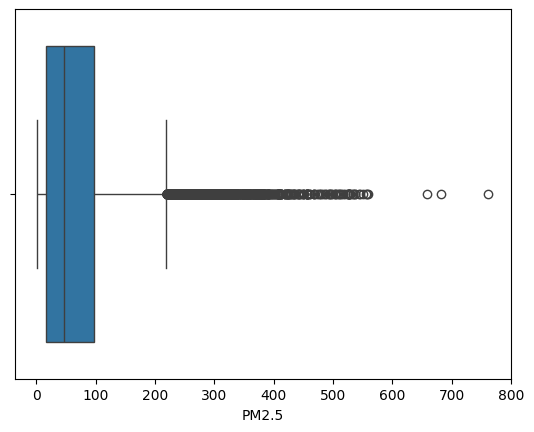

In [9]:
sns.boxplot(x=df_huairou['PM2.5'])

Memplot kolom PM2.5 menggunakan boxplot.

<Axes: xlabel='PM10'>

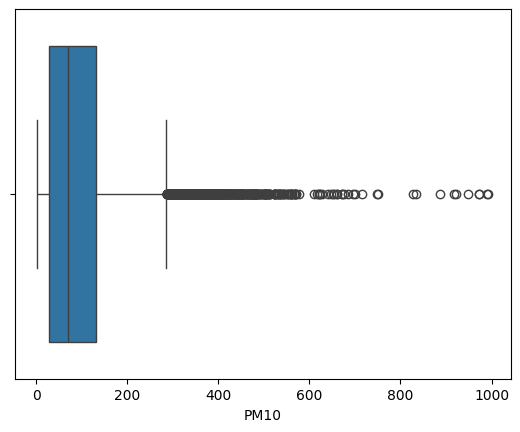

In [10]:
sns.boxplot(x=df_huairou['PM10'])

Memplot kolom PM10 menggunakan boxplot.

<Axes: xlabel='SO2'>

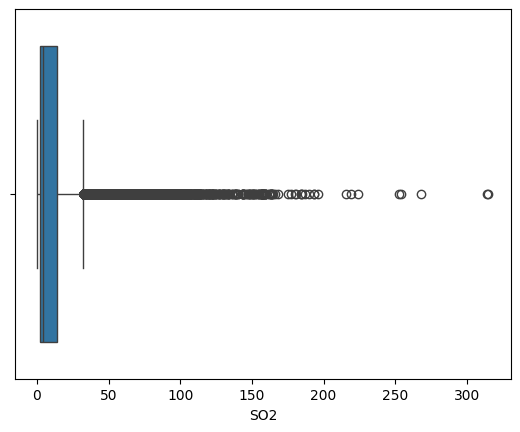

In [11]:
sns.boxplot(x=df_huairou['SO2'])

Memplot kolom SO2 menggunakan boxplot.

<Axes: xlabel='NO2'>

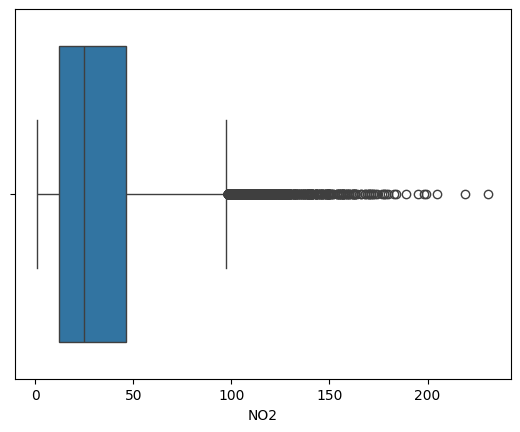

In [12]:
sns.boxplot(x=df_huairou['NO2'])

Memplot kolom NO2 menggunakan boxplot.

<Axes: xlabel='CO'>

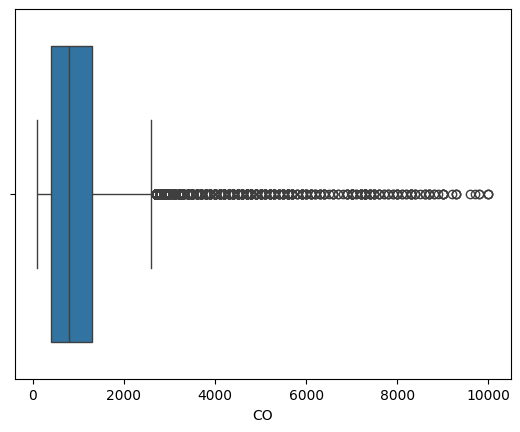

In [13]:
sns.boxplot(x=df_huairou['CO'])

Memplot kolom CO menggunakan boxplot.

<Axes: xlabel='O3'>

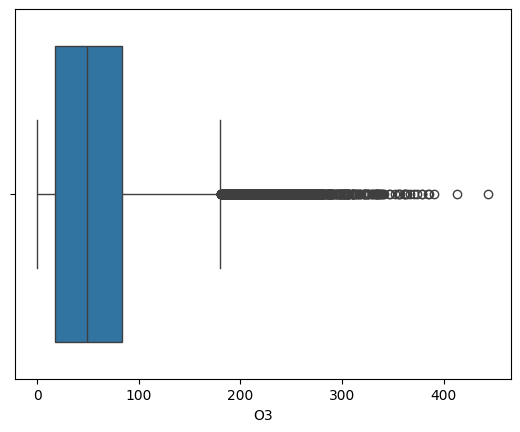

In [14]:
sns.boxplot(x=df_huairou['O3'])

Memplot kolom O3 menggunakan boxplot.

**Insight:**
- Dataset memiliki 7485 data dengan missing value.
- Dataset tidak memiliki data yang duplikat.
- Beberapa nilai esktrem pada kolom PM2.5, PM10, SO2, NO2, CO, O3.
- Ada 2 kemungkinan yang terjadi kenapa terdapat nilai esktrem tersebut:
  - Karena bencana alam atau aktifitas industri.
  - Karena kesalahan dalam sensor.

### Cleaning Data

In [15]:
df_huairou.drop(columns=['station', 'No', 'DEWP', 'RAIN', 'wd', 'WSPM'], inplace=True)

Mengdrop kolom station dan No karena tidak dibutuhkan untuk perhitungan.

In [16]:
df_huairou.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES
0,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3
1,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8
2,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6
3,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3
4,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1


Menampilkan ulang 5 baris data pertama untuk mengecek perubahan pada DataFrame.

In [17]:
df_huairou.ffill(inplace=True)

Melakukan teknik imputasi pada data kosong, menggunakan metode forward fill karena data diasumsikan tidak berubah secara drastis dari data sebelum nya.

In [18]:
print(df_huairou.isna().sum())

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
dtype: int64


Menampilkan ulang jumlah data missing pada DataFrame untuk mengecek perubahan.

In [19]:
df_huairou.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,69.949581,92.653699,12.262239,32.043274,1022.401152,61.353597,12.429991,1007.613071
std,1.177213,3.448752,8.800218,6.922285,71.196244,85.126682,18.924688,26.300180,894.945408,57.321555,11.755338,10.026512
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000
25%,2014.000000,4.000000,8.000000,5.750000,17.000000,29.000000,2.000000,12.000000,400.000000,19.000000,2.100000,999.400000
50%,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.500000,1007.300000
75%,2016.000000,10.000000,23.000000,17.250000,99.000000,132.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000
max,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000


Menampilkan ulang statistik terhadap kolom-kolom dalam DataFrame setelah melakukan data cleaning.

## Exploratory Data Analysis (EDA)

### Eksplorasi tingkat polusi udara di Kota Huairou.
- Dalam 24 jam pada tanggal 01/03/2013 dimulai dari jam 00.00 sampai jam 23.00
- Dalam 31 hari dimulai dari tanggal 01/01/2014 sampai 31/01/2014
- Dalam 12 bulan dimulai dari Januari 2014 sampai Desember 2014
- Dalam 5 tahun dimulai dari tahun 2013 sampai 2017

In [20]:
polusi_udara_per_jam = df_huairou.pivot_table(
    index=['year', 'month', 'day', 'hour'],
    values=["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
    aggfunc='mean'
).sort_index()

polusi_udara_per_jam = polusi_udara_per_jam.reset_index()

polusi_udara_per_jam['time'] = polusi_udara_per_jam['hour'].astype(str).str.zfill(2) + ":00"

polusi_udara_per_jam.head(24)

,year,month,day,hour,CO,NO2,O3,PM10,PM2.5,SO2,time
0,2013,3,1,0,100.0,2.0,91.0,7.0,7.0,3.0,00:00
1,2013,3,1,1,100.0,2.0,92.0,4.0,4.0,3.0,01:00
2,2013,3,1,2,100.0,2.0,91.0,4.0,4.0,3.0,02:00
3,2013,3,1,3,100.0,2.0,91.0,3.0,3.0,3.0,03:00
4,2013,3,1,4,300.0,2.0,86.0,3.0,3.0,7.0,04:00
5,2013,3,1,5,200.0,3.0,85.0,4.0,4.0,3.0,05:00
6,2013,3,1,6,300.0,7.0,82.0,6.0,3.0,33.0,06:00
7,2013,3,1,7,400.0,13.0,71.0,10.0,3.0,13.0,07:00
8,2013,3,1,8,800.0,38.0,45.0,13.0,3.0,34.0,08:00
9,2013,3,1,9,700.0,28.0,60.0,36.0,17.0,50.0,09:00


Membuat DataFrame baru dengan nama polusi_udara_per_jam menggunakan function pivot.table() untuk menampilkan tingkat polusi udara dalam 24 jam.

In [21]:
polusi_udara_per_hari = df_huairou.pivot_table(
    index=['year', 'month', 'day'],
    values=["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
    aggfunc='mean'
).sort_index()

polusi_udara_per_hari = polusi_udara_per_hari.reset_index()

polusi_udara_per_hari['date'] = (
    polusi_udara_per_hari['day'].astype(str).str.zfill(2) + "/" +
    polusi_udara_per_hari['month'].astype(str).str.zfill(2) + "/" +
    polusi_udara_per_hari["year"].astype(str)
)

polusi_udara_per_hari.iloc[306:337]

,year,month,day,CO,NO2,O3,PM10,PM2.5,SO2,date
306,2014,1,1,1287.500000,41.333333,34.500000,99.958333,49.291667,23.166667,01/01/2014
307,2014,1,2,2095.833333,67.083333,14.791667,139.875000,89.208333,51.041667,02/01/2014
308,2014,1,3,1320.833333,55.916667,27.500000,84.333333,52.541667,37.791667,03/01/2014
309,2014,1,4,1816.666667,70.666667,6.000000,134.708333,108.333333,46.250000,04/01/2014
310,2014,1,5,1587.500000,64.000000,19.708333,114.166667,103.666667,34.458333,05/01/2014
311,2014,1,6,2166.666667,75.916667,2.416667,185.833333,170.500000,46.000000,06/01/2014
312,2014,1,7,1345.833333,56.291667,24.041667,107.833333,110.583333,28.916667,07/01/2014
313,2014,1,8,541.666667,26.083333,46.458333,25.458333,21.291667,21.791667,08/01/2014
314,2014,1,9,833.333333,24.666667,40.375000,39.416667,26.750000,18.583333,09/01/2014
315,2014,1,10,1258.333333,50.750000,20.291667,71.750000,48.791667,39.166667,10/01/2014


Membuat DataFrame baru dengan nama polusi_udara_per_hari menggunakan function pivot.table() untuk menampilkan tingkat polusi udara dalam 31 hari.

In [22]:
polusi_udara_per_bulan = df_huairou.pivot_table(
    index=['year', 'month'],
    values=["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
    aggfunc='mean'
).sort_index()

polusi_udara_per_bulan = polusi_udara_per_bulan.reset_index()

polusi_udara_per_bulan['date'] = (
    polusi_udara_per_bulan['month'].astype(str).str.zfill(2) + "/" +
    polusi_udara_per_bulan["year"].astype(str)
)

polusi_udara_per_bulan.iloc[10:22]

,year,month,CO,NO2,O3,PM10,PM2.5,SO2,date
10,2014,1,1485.080645,55.287634,27.271505,103.283602,86.461022,47.426075,01/2014
11,2014,2,1900.446429,56.473214,36.742560,148.507440,148.199405,55.339286,02/2014
12,2014,3,1129.301075,46.483871,62.375000,119.486559,90.463710,30.263441,03/2014
13,2014,4,812.500000,41.911111,80.072222,129.170833,84.905556,13.566667,04/2014
14,2014,5,756.720430,28.502957,100.852823,88.932796,51.491398,10.375000,05/2014
15,2014,6,818.472222,21.720833,121.806944,68.533333,49.258333,6.761111,06/2014
16,2014,7,975.672043,22.981720,111.826075,118.074328,98.968145,4.463710,07/2014
17,2014,8,738.978495,21.556720,111.167608,74.184677,55.546909,4.166667,08/2014
18,2014,9,872.500000,26.284028,70.313889,75.842361,60.318750,5.150000,09/2014
19,2014,10,1156.451613,39.236559,40.651882,115.915323,96.204301,6.841398,10/2014


Membuat DataFrame baru dengan nama polusi_udara_per_bulan menggunakan function pivot.table() untuk menampilkan tingkat polusi udara dalam 12 bulan.

In [23]:
polusi_udara_per_tahun = df_huairou.pivot_table(
    index=['year'],
    values=["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"],
    aggfunc='mean'
).sort_index()

polusi_udara_per_tahun = polusi_udara_per_tahun.reset_index()

polusi_udara_per_tahun

,year,CO,NO2,O3,PM10,PM2.5,SO2
0,2013,982.717048,35.088816,66.602688,99.152369,69.883987,17.198169
1,2014,1078.972603,36.999543,68.953390,100.169247,77.538881,17.767797
2,2015,1040.148402,28.309715,59.690263,90.257500,70.824486,8.674989
3,2016,934.403461,27.190801,53.411088,82.285519,60.943306,6.625114
4,2017,1314.336158,38.785311,46.674435,91.596045,73.795904,9.764124


Membuat DataFrame baru dengan nama polusi_udara_per_tahun menggunakan function pivot.table() untuk menampilkan tingkat polusi udara dalam 5 tahun.

### Eksplorasi tingkat suhu dan tekanan udara di Kota Huairou.
- Dalam 24 jam pada tanggal 01/03/2013 dimulai dari jam 00.00 sampai jam 23.00
- Dalam 31 hari dimulai dari tanggal 01/01/2014 sampai 31/01/2014
- Dalam 12 bulan dimulai dari Januari 2014 sampai Desember 2014
- Dalam 5 tahun dimulai dari tahun 2013 sampai 2017

In [24]:
suhu_tekanan_udara_per_jam = df_huairou.pivot_table(
    index=['year', 'month', 'day', 'hour'],
    values=["TEMP", "PRES"],
    aggfunc='mean'
).sort_index()

suhu_tekanan_udara_per_jam = suhu_tekanan_udara_per_jam.reset_index()

suhu_tekanan_udara_per_jam['time'] = (suhu_tekanan_udara_per_jam['hour'].astype(str).str.zfill(2) + ":00")

suhu_tekanan_udara_per_jam.head(24)

,year,month,day,hour,PRES,TEMP,time
0,2013,3,1,0,1020.3,-2.3,00:00
1,2013,3,1,1,1020.8,-2.7,01:00
2,2013,3,1,2,1020.6,-3.2,02:00
3,2013,3,1,3,1021.3,-3.3,03:00
4,2013,3,1,4,1022.1,-4.1,04:00
5,2013,3,1,5,1022.3,-4.2,05:00
6,2013,3,1,6,1023.1,-5.9,06:00
7,2013,3,1,7,1024.3,-2.7,07:00
8,2013,3,1,8,1025.2,-1.6,08:00
9,2013,3,1,9,1025.4,-1.1,09:00


Membuat DataFrame baru dengan nama suhu_tekanan_udara_per_jam menggunakan function pivot.table() untuk menampilkan tingkat suhu dan tekanan udara dalam 24 Jam.

In [25]:
suhu_tekanan_udara_per_hari = df_huairou.pivot_table(
    index=['year', 'month', 'day'],
    values=["TEMP", "PRES"],
    aggfunc='mean'
).sort_index()

suhu_tekanan_udara_per_hari = suhu_tekanan_udara_per_hari.reset_index()

suhu_tekanan_udara_per_hari['date'] = (
    suhu_tekanan_udara_per_hari['day'].astype(str).str.zfill(2) + "/" +
    suhu_tekanan_udara_per_hari['month'].astype(str).str.zfill(2) + "/" +
    suhu_tekanan_udara_per_hari["year"].astype(str)
)

suhu_tekanan_udara_per_hari.iloc[306:337]

,year,month,day,PRES,TEMP,date
306,2014,1,1,1005.591667,1.516667,01/01/2014
307,2014,1,2,1009.275000,-0.291667,02/01/2014
308,2014,1,3,1013.512500,1.966667,03/01/2014
309,2014,1,4,1013.545833,-1.620833,04/01/2014
310,2014,1,5,1015.641667,-1.850000,05/01/2014
311,2014,1,6,1016.758333,-1.450000,06/01/2014
312,2014,1,7,1018.183333,-0.737500,07/01/2014
313,2014,1,8,1024.333333,-4.562500,08/01/2014
314,2014,1,9,1022.304167,-7.350000,09/01/2014
315,2014,1,10,1021.491667,-6.975000,10/01/2014


Membuat DataFrame baru dengan nama suhu_tekanan_udara_per_hari menggunakan function pivot.table() untuk menampilkan tingkat suhu dan tekanan udara dalam 31 hari.

In [26]:
suhu_tekanan_udara_per_bulan = df_huairou.pivot_table(
    index=['year', 'month'],
    values=["TEMP", "PRES"],
    aggfunc='mean'
).sort_index()

suhu_tekanan_udara_per_bulan = suhu_tekanan_udara_per_bulan.reset_index()

suhu_tekanan_udara_per_bulan['date'] = (
    suhu_tekanan_udara_per_bulan['month'].astype(str).str.zfill(2) + "/" +
    suhu_tekanan_udara_per_bulan["year"].astype(str)
)

suhu_tekanan_udara_per_bulan.iloc[10:22]

,year,month,PRES,TEMP,date
10,2014,1,1016.891129,-2.141532,01/2014
11,2014,2,1019.252827,-1.454464,02/2014
12,2014,3,1010.521909,8.766129,03/2014
13,2014,4,1007.279861,16.131667,04/2014
14,2014,5,998.426075,20.631720,05/2014
15,2014,6,997.107222,23.986667,06/2014
16,2014,7,995.640860,26.895699,07/2014
17,2014,8,999.610753,25.147715,08/2014
18,2014,9,1005.689028,19.456250,09/2014
19,2014,10,1011.492070,12.724059,10/2014


Membuat DataFrame baru dengan nama suhu_tekanan_udara_per_bulan menggunakan function pivot.table() untuk menampilkan tingkat suhu dan tekanan udara dalam 12 bulan.

In [27]:
suhu_tekanan_udara_per_tahun = df_huairou.pivot_table(
    index=['year'],
    values=["TEMP", "PRES"],
    aggfunc='mean'
).sort_index()

suhu_tekanan_udara_per_tahun = suhu_tekanan_udara_per_tahun.reset_index()

suhu_tekanan_udara_per_tahun

,year,PRES,TEMP
0,2013,1004.994363,14.660335
1,2014,1007.494852,12.799692
2,2015,1007.901087,12.406097
3,2016,1007.905808,12.414866
4,2017,1018.328447,-1.183044


Membuat DataFrame baru dengan nama suhu_tekanan_udara_per_year menggunakan function pivot.table() untuk menampilkan tingkat suhu dan tekanan udara dalam 5 tahun.

In [28]:
kolom = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']
df_korelasi= df_huairou[kolom].copy()

Membuat DataFrame baru untuk melihat korelasi/relationship antar kolom yang dipilih.

In [29]:
korelasi = df_korelasi.corr(method = "pearson")
korelasi

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES
PM2.5,1.000000,0.871757,0.412651,0.654079,0.792639,-0.039970,-0.072519,-0.011472
PM10,0.871757,1.000000,0.409700,0.628949,0.688984,0.051311,-0.004669,-0.079395
SO2,0.412651,0.409700,1.000000,0.535097,0.422652,-0.035126,-0.215155,0.176812
NO2,0.654079,0.628949,0.535097,1.000000,0.715984,-0.308379,-0.332513,0.224827
CO,0.792639,0.688984,0.422652,0.715984,1.000000,-0.229067,-0.259188,0.141609
O3,-0.039970,0.051311,-0.035126,-0.308379,-0.229067,1.000000,0.556999,-0.426208
TEMP,-0.072519,-0.004669,-0.215155,-0.332513,-0.259188,0.556999,1.000000,-0.821082
PRES,-0.011472,-0.079395,0.176812,0.224827,0.141609,-0.426208,-0.821082,1.000000


Menghitung korelasi/relationship antar kolom dengan menghitung koefisien korelasi pearson

**Insight:**
- Data menunjukan dalam 24 jam, tingkat PM10 dan PM2.5  tertinggi tercatat pada pukul 10:00 dan pukul 21:00.
- Data menunjukan dalam 31 hari, tingkat PM10 dan PM2.5 tertinggi tercatat pada tanggal 16/01/2014.
- Data menunjukan dalam 12 bulan, tingkat PM10 dan PM2.5 tertinggi tercatat pada bulan Februari.
- Data menunjukan dalam 5 tahun, tingkat PM10 dan PM2.5 tertinggi tercata pada tahun 2014.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana trend polusi udara di kota Huairou?

In [30]:
def plot_pollutant(ax, x, y, title):
    ax.plot(x, y, marker='o', linewidth=2, color="#1a5223")
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation=90)
    ax.set_ylabel(title, fontsize=25)
    ax.set_title(title, loc="center", fontsize=35)

    return plot_pollutant

def grafik_polusi_udara_time(df):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    for i, pollutant in enumerate(pollutants):
        row, col = divmod(i, 2)
        plot_pollutant(ax[row, col], df['time'], df[pollutant], pollutant)

    fig.tight_layout(pad=2.0)
    plt.suptitle("Trend Polusi Udara di Kota Huairou (Time)", fontsize=45, y=1.05)
    plt.show()

    return grafik_polusi_udara_time

Membuat function grafik_polusi_udara_time dan function helper plot_pollutant untuk menampilkan trend polusi udara di Kota Huairou dalam 24 jam.

In [31]:
def plot_pollutant(ax, x, y, title):
    ax.plot(x, y, marker='o', linewidth=2, color="#1a5223")
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation=90)
    ax.set_ylabel(title, fontsize=25)
    ax.set_title(title, loc="center", fontsize=35)

    return plot_pollutant

def grafik_polusi_udara_date(df):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    for i, pollutant in enumerate(pollutants):
        row, col = divmod(i, 2)
        plot_pollutant(ax[row, col], df['date'], df[pollutant], pollutant)

    fig.tight_layout(pad=2.0)
    plt.suptitle("Trend Polusi Udara di Kota Huairou (Date)", fontsize=45, y=1.05)
    plt.show()

    return grafik_polusi_udara_date

Membuat function grafik_polusi_udara_date dan function helper plot_pollutant untuk menampilkan trend polusi udara di Kota Huairou dalam 31 hari dan 12 bulan.

In [32]:
def plot_pollutant(ax, x, y, title):
    ax.plot(x, y, marker='o', linewidth=2, color="#1a5223")
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation=90)
    ax.set_ylabel(title, fontsize=25)
    ax.set_title(title, loc="center", fontsize=35)

    return plot_pollutant

def grafik_polusi_udara_year(df):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

    for i, pollutant in enumerate(pollutants):
        row, col = divmod(i, 2)
        plot_pollutant(ax[row, col], df['year'], df[pollutant], pollutant)

    fig.tight_layout(pad=2.0)
    plt.suptitle("Trend Polusi Udara di Kota Huairou (Year)", fontsize=45, y=1.05)
    plt.show()

    return grafik_polusi_udara_year

Membuat function grafik_polusi_udara_year dan function helper plot_pollutant untuk menampilkan trend polusi udara di Kota Huairou dalam 5 tahun.

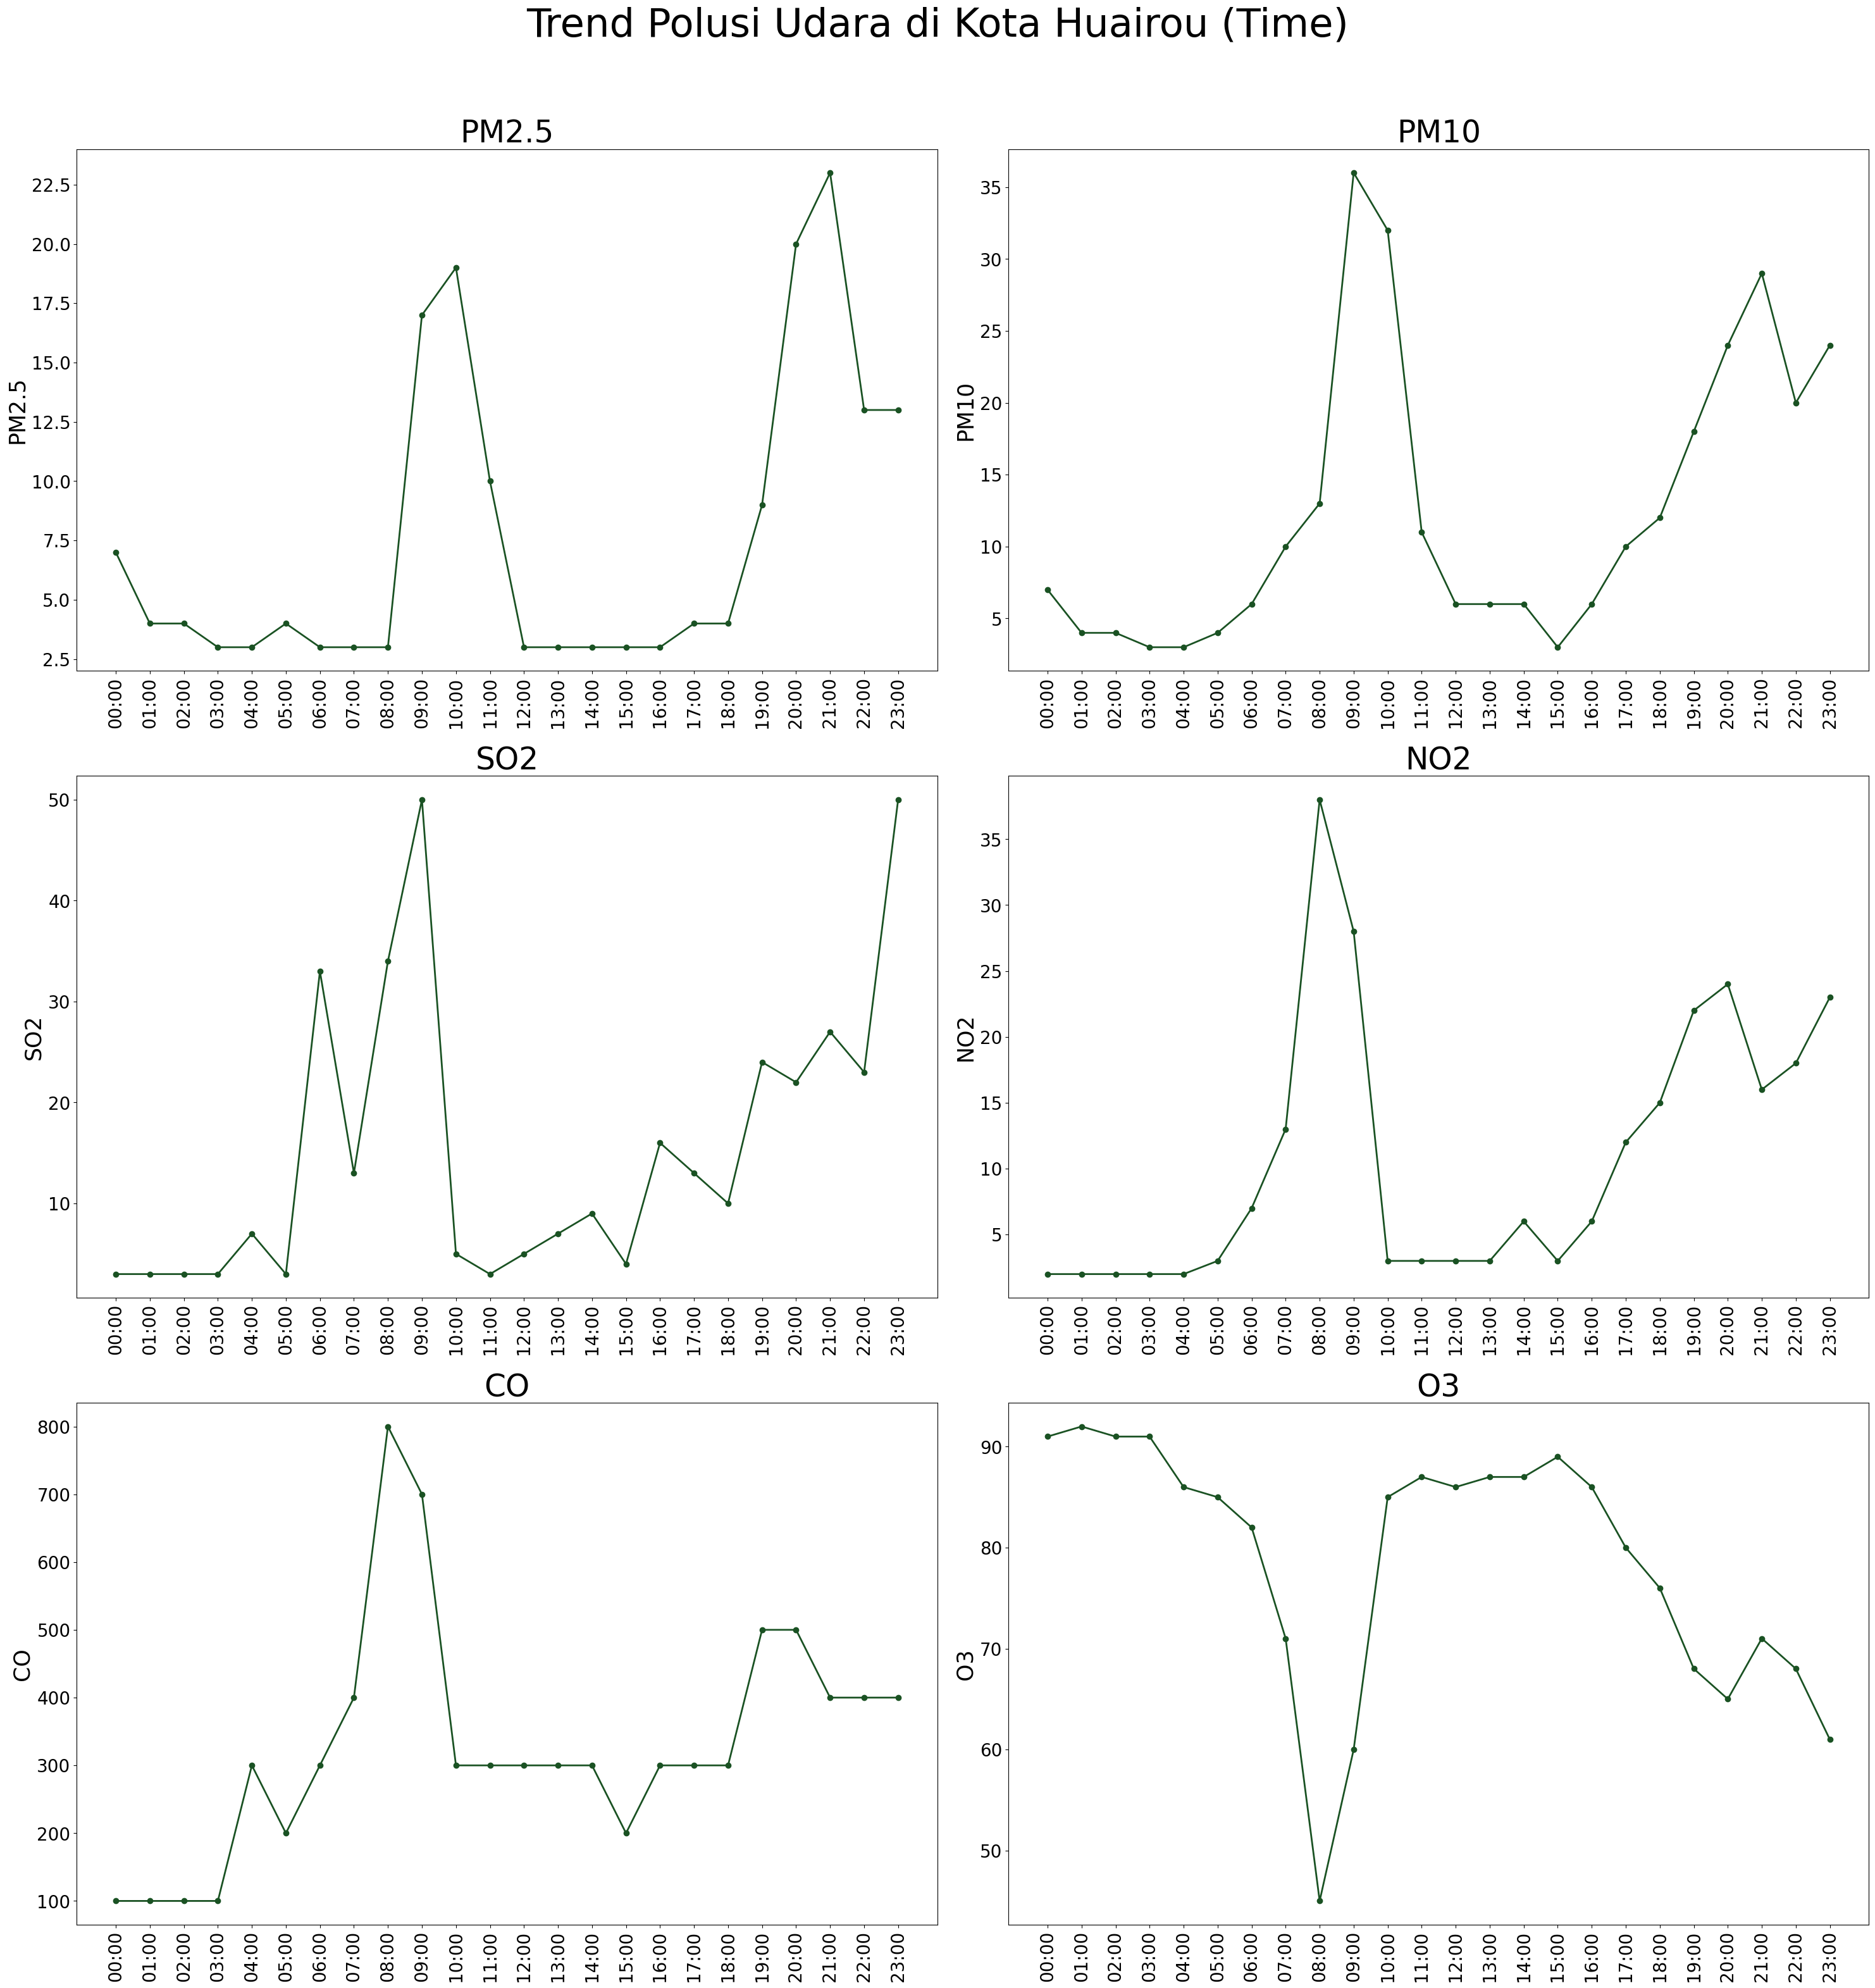

<function __main__.grafik_polusi_udara_time(df)>

In [33]:
grafik_polusi_udara_time(polusi_udara_per_jam.head(24))

Menampilkan grafik trend polusi dalam 24 jam udara dengan function yang telah dibuat

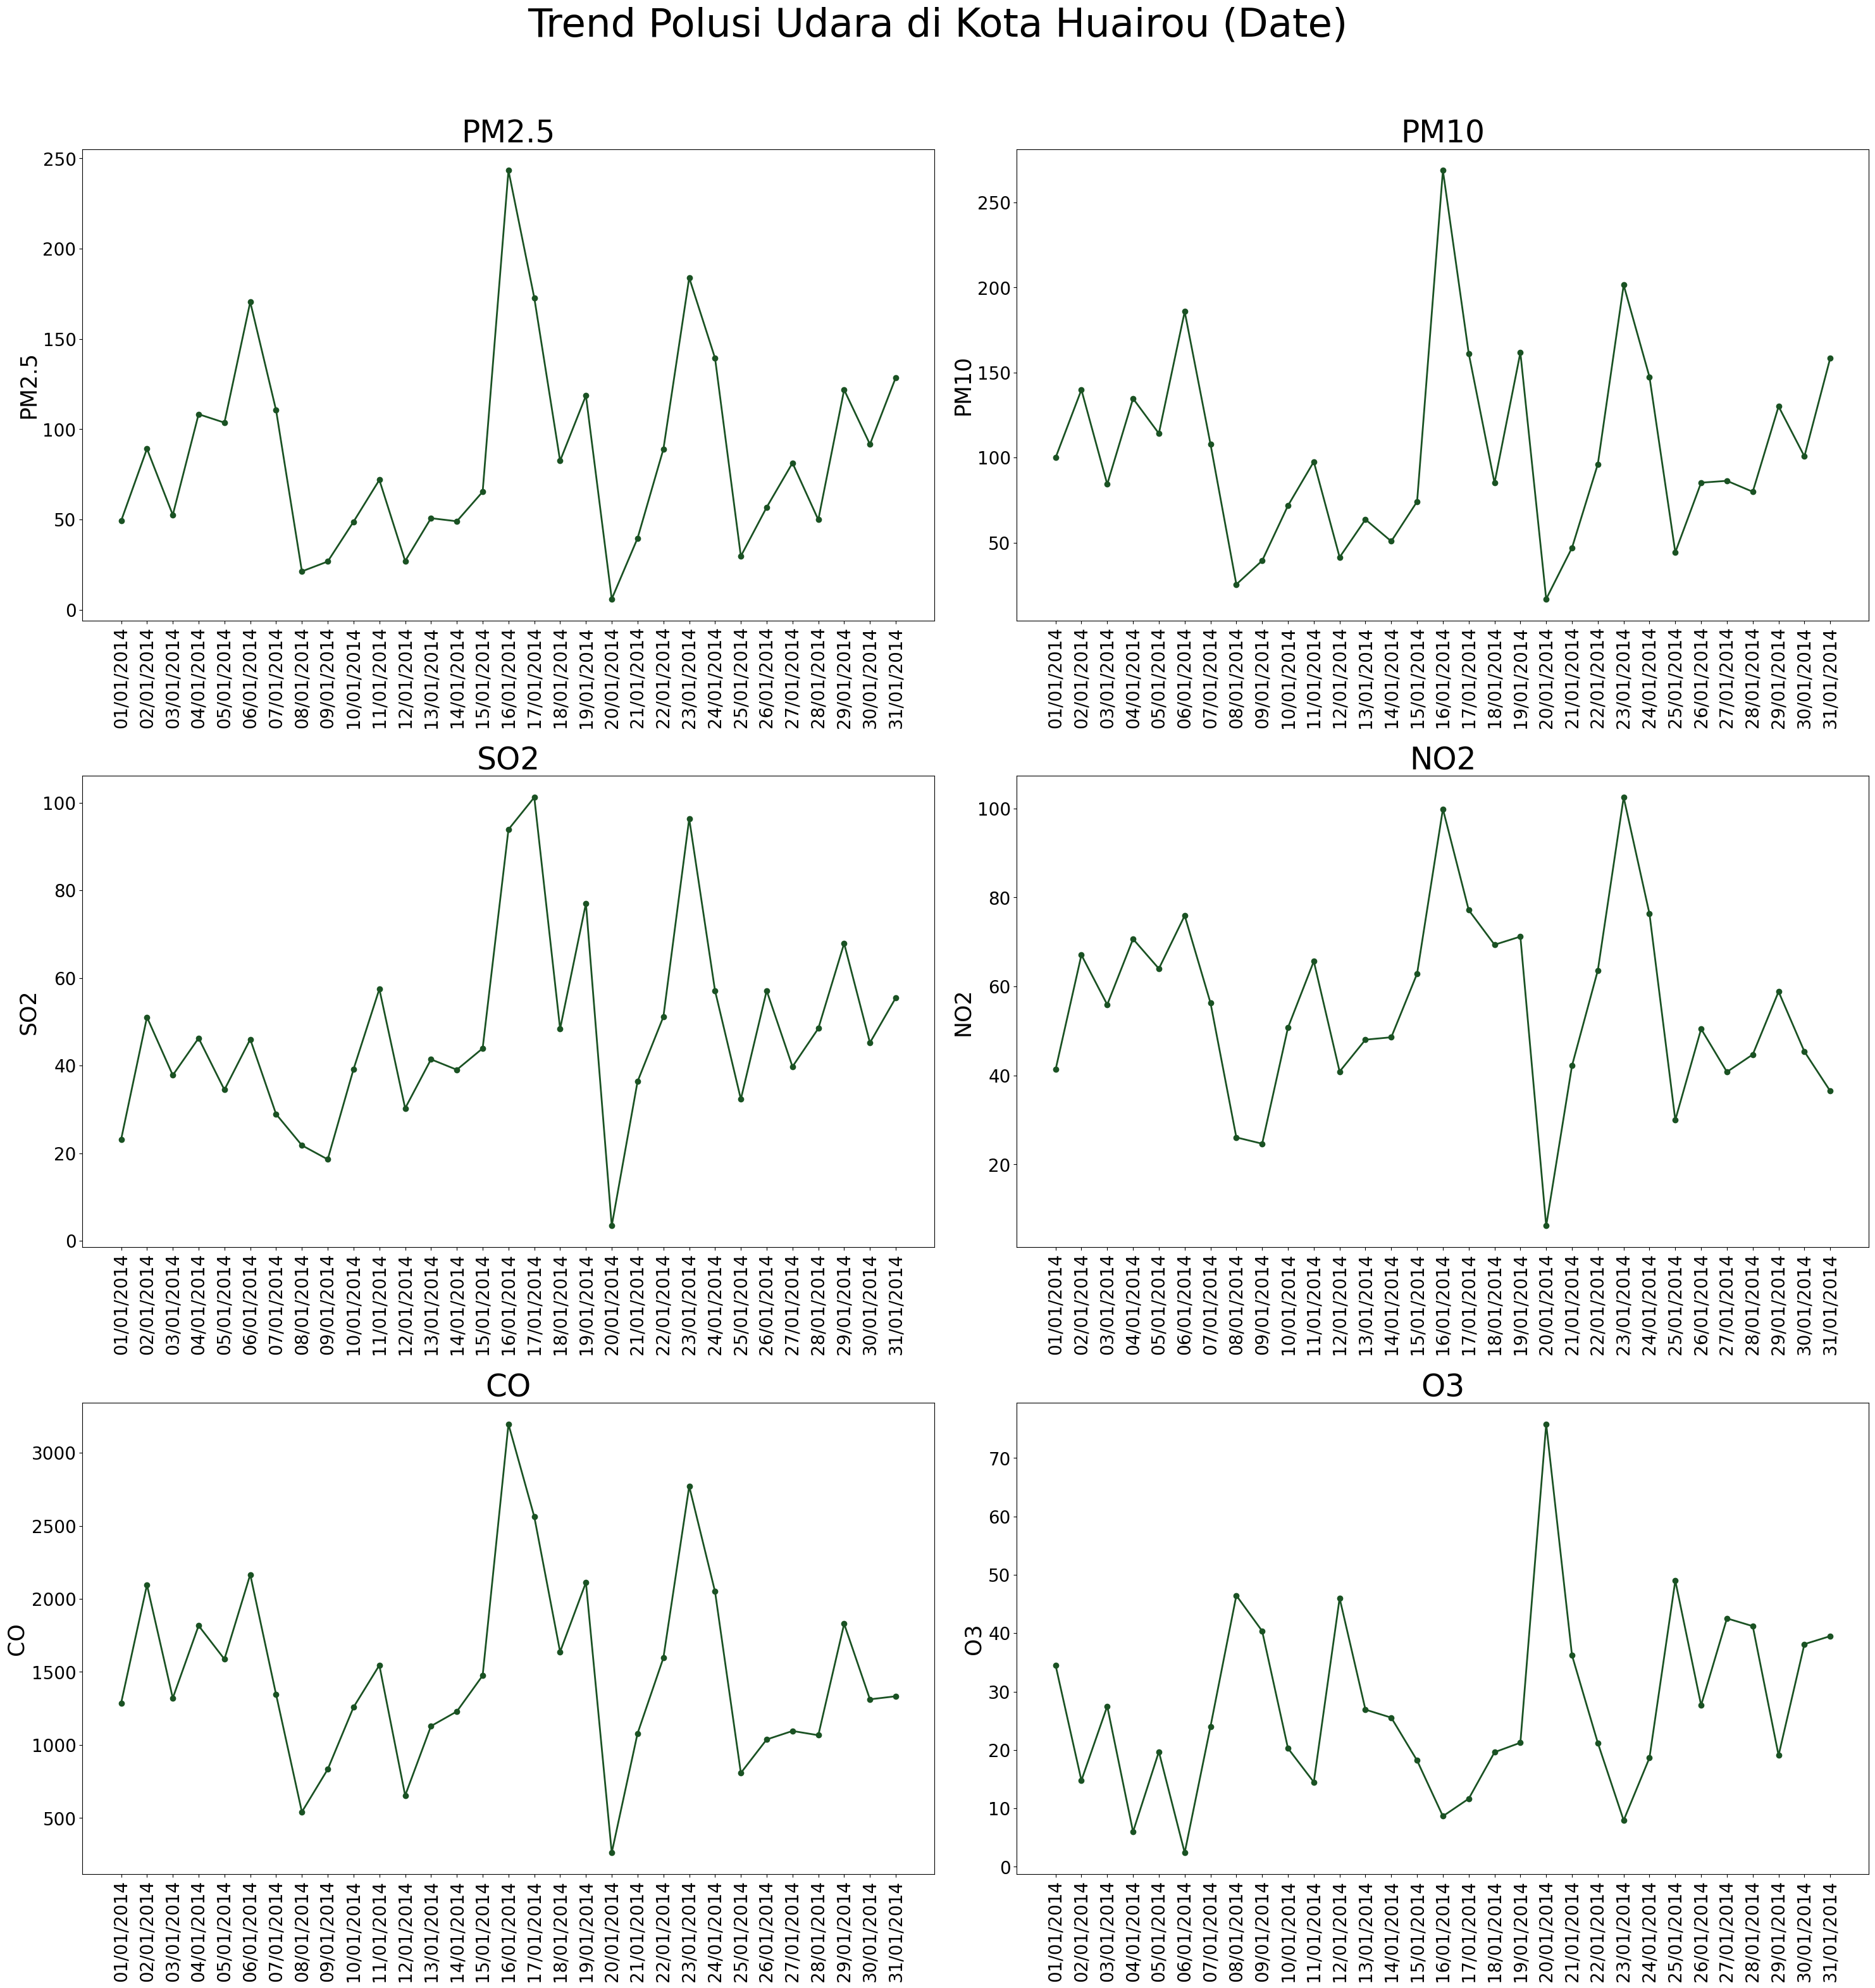

<function __main__.grafik_polusi_udara_date(df)>

In [34]:
grafik_polusi_udara_date(polusi_udara_per_hari.iloc[306:337])

Menampilkan grafik trend polusi dalam 31 hari udara dengan function yang telah dibuat

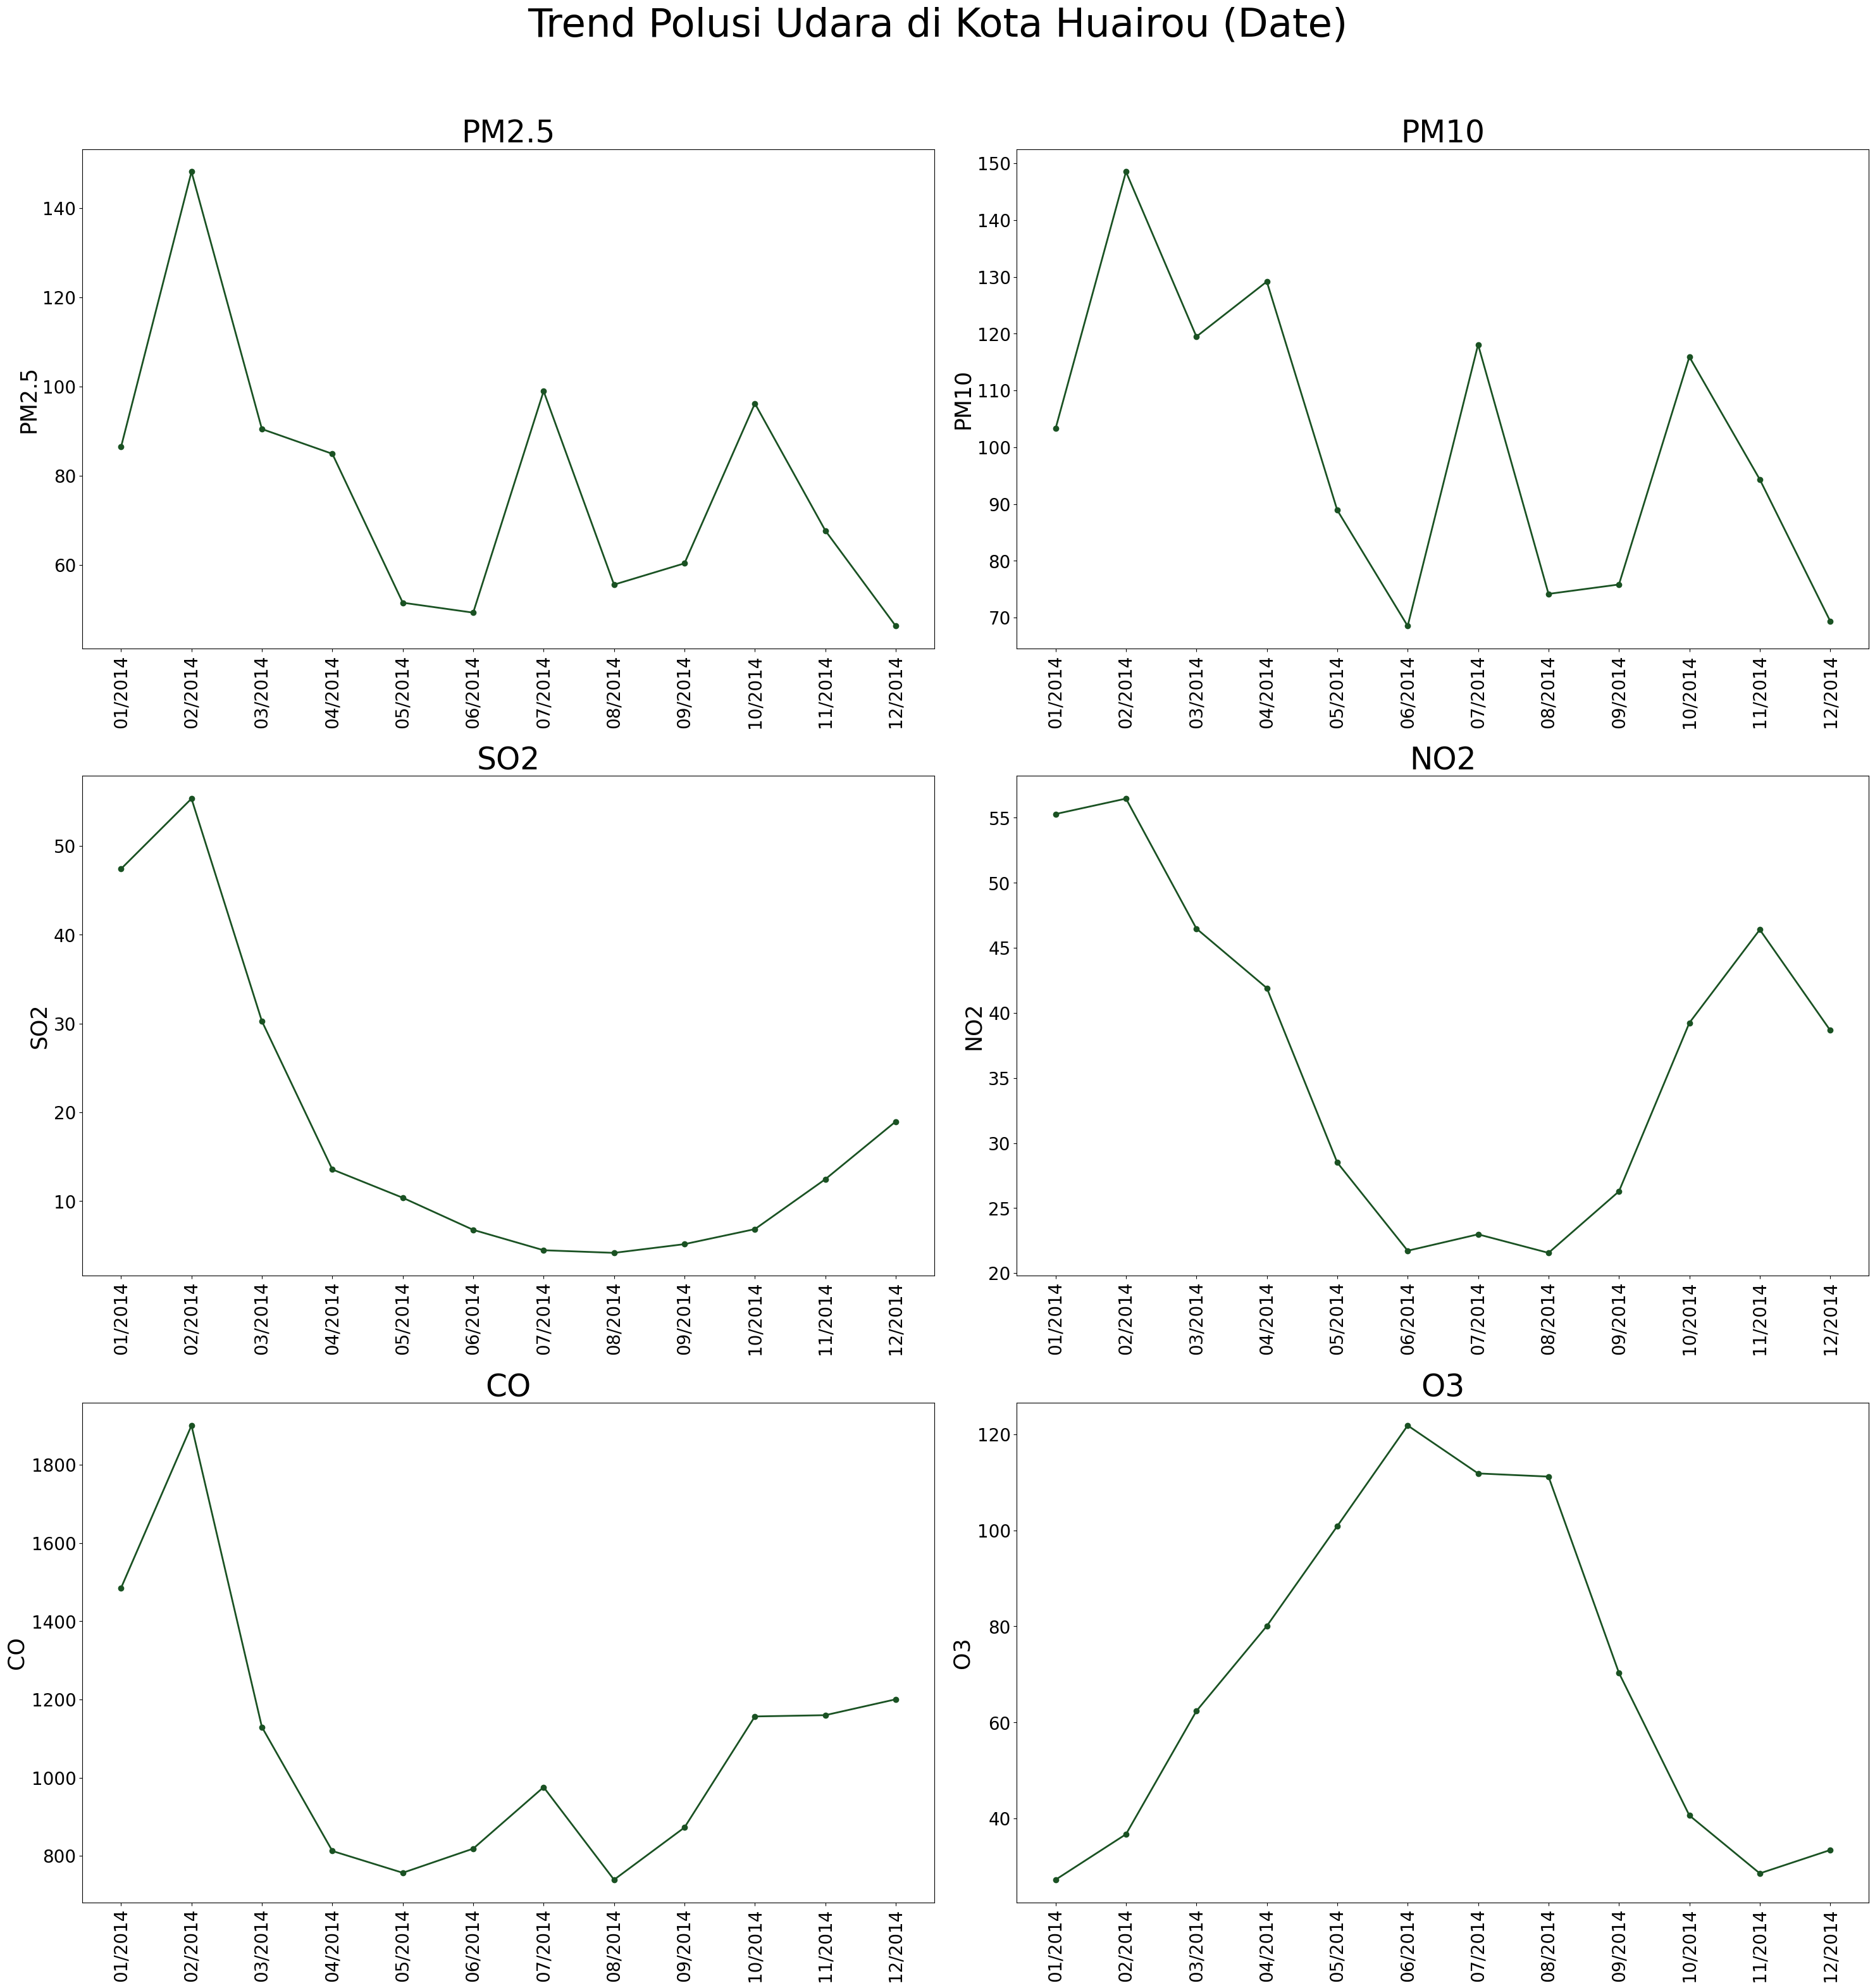

<function __main__.grafik_polusi_udara_date(df)>

In [35]:
grafik_polusi_udara_date(polusi_udara_per_bulan.iloc[10:22])

Menampilkan grafik trend polusi udara dalam 12 bulan dengan function yang telah dibuat

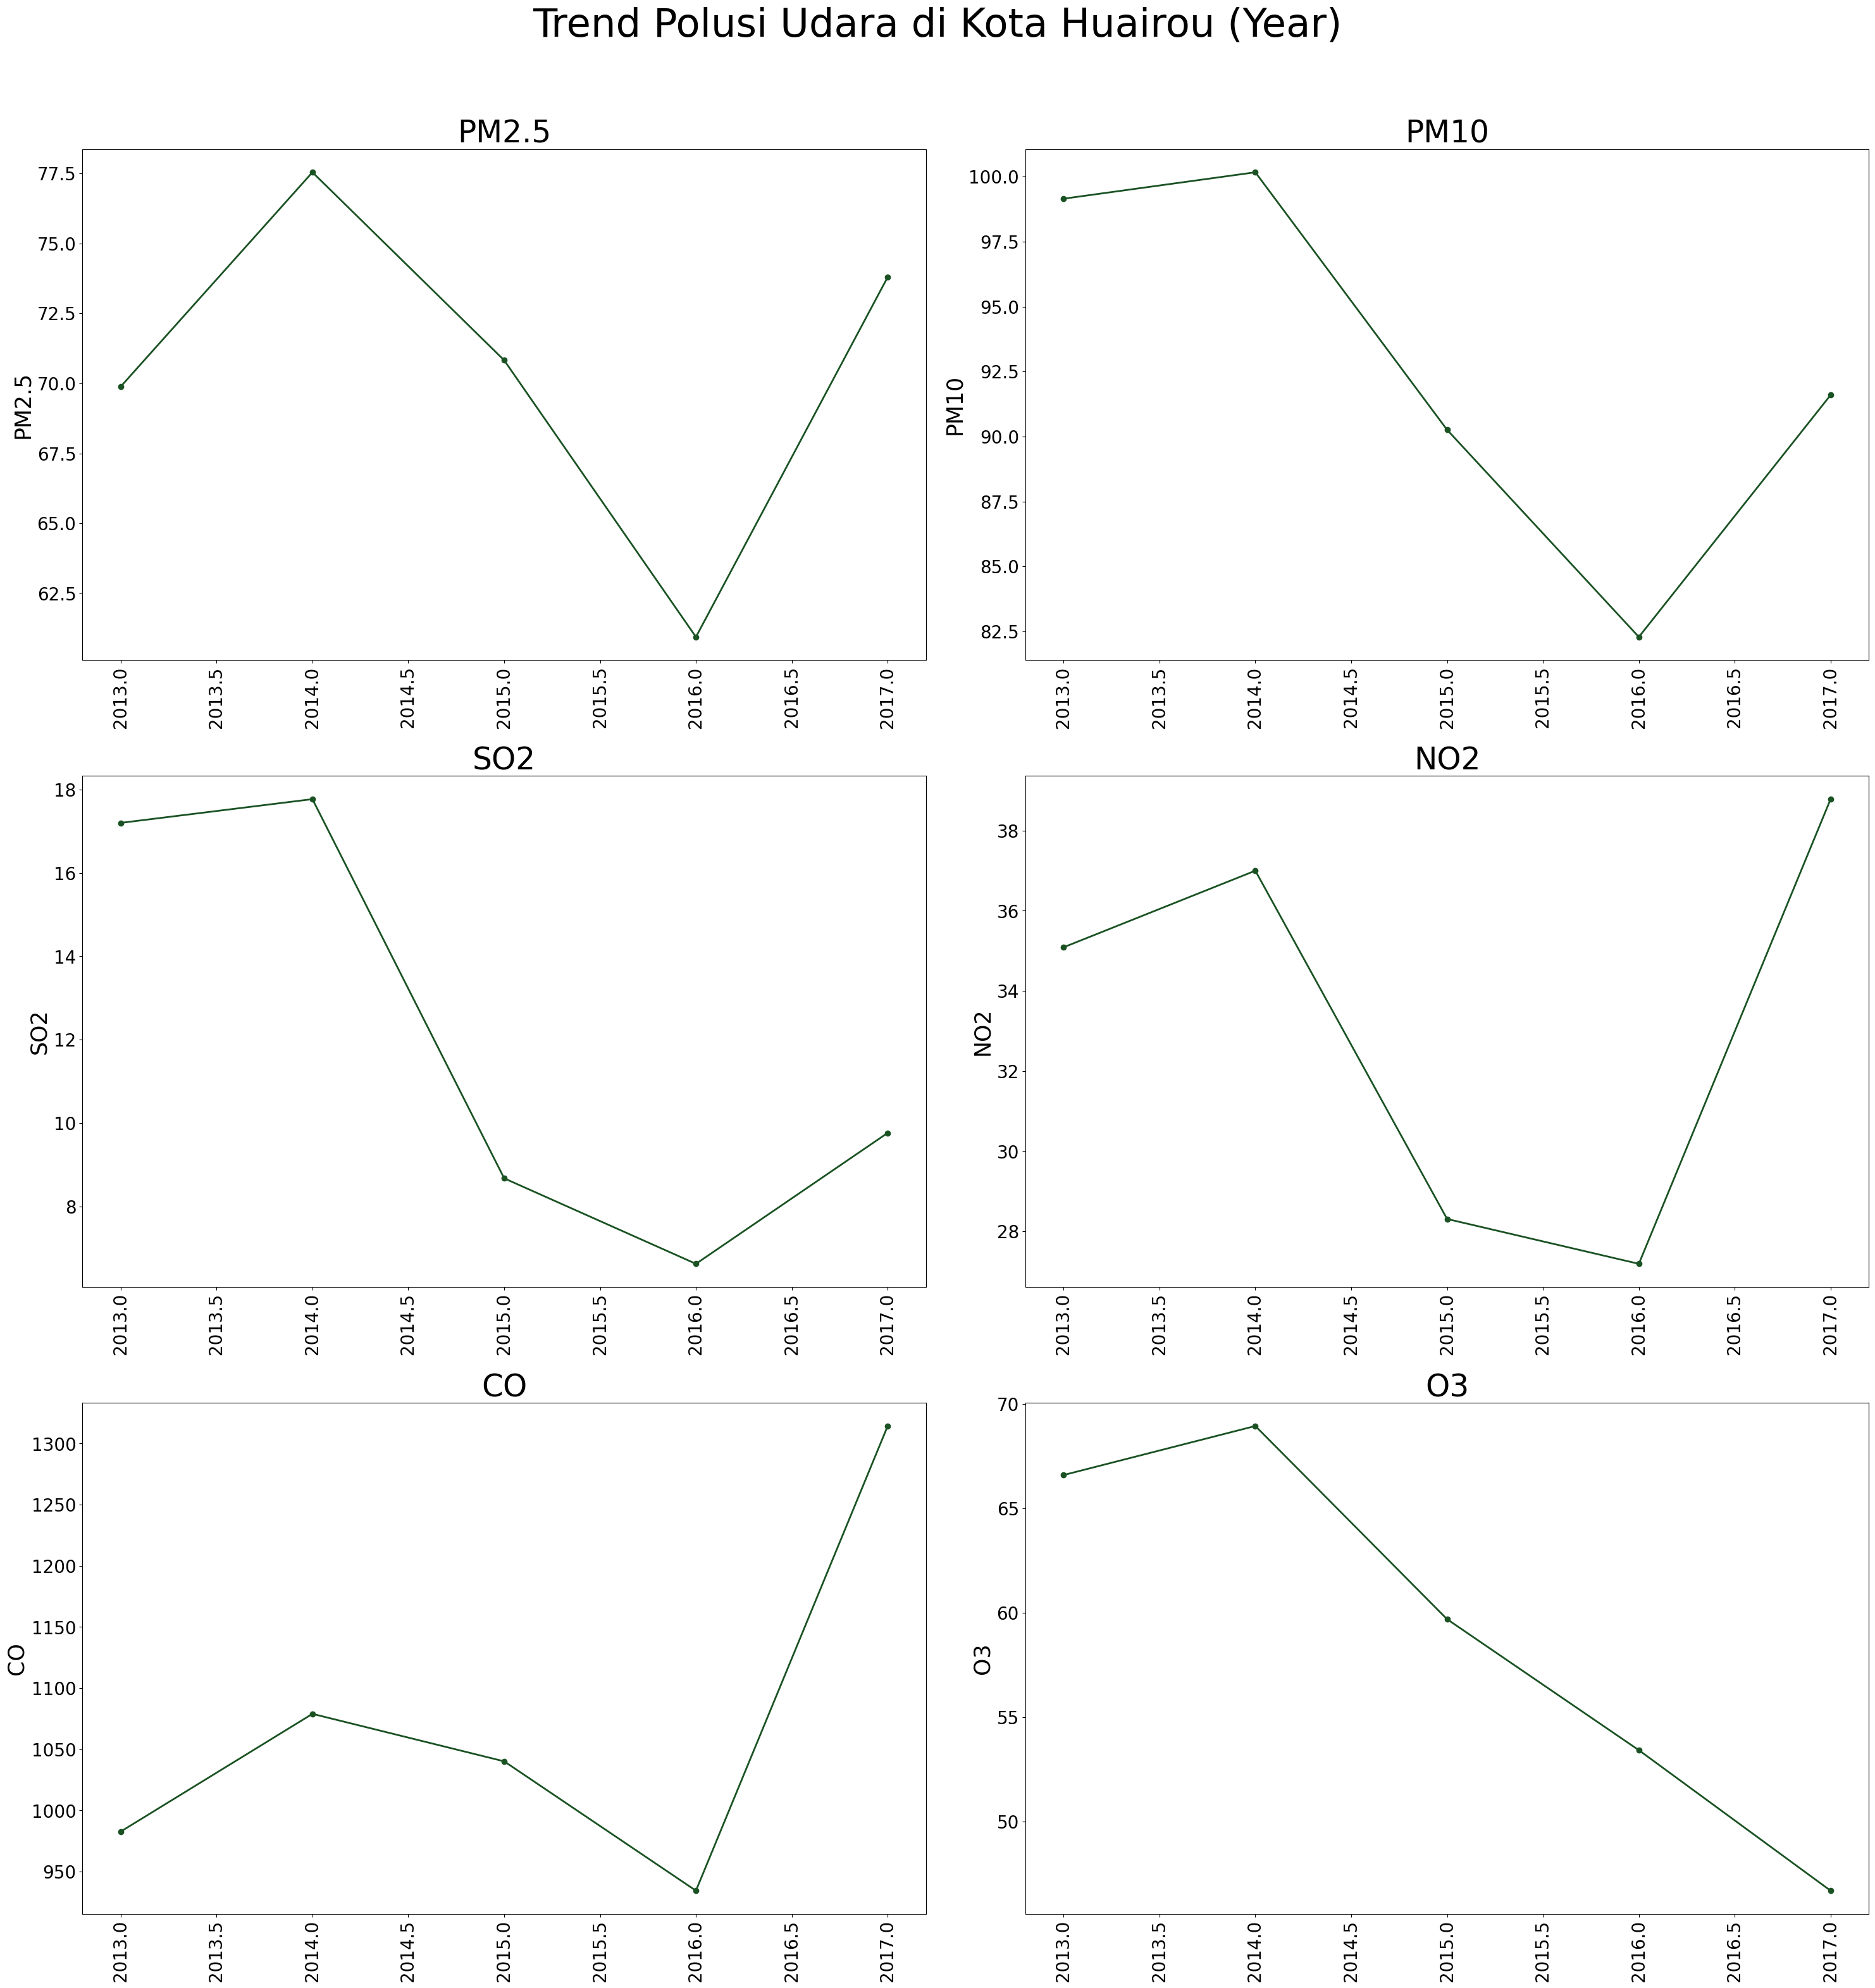

<function __main__.grafik_polusi_udara_year(df)>

In [36]:
grafik_polusi_udara_year(polusi_udara_per_tahun)

Menampilkan grafik trend polusi udara dalam 5 tahun dengan function yang telah dibuat

In [37]:
def get_kategori_kualitas_udara(value, thresholds):
    for threshold, category in thresholds:
        if value <= threshold:
            return category
    return "BERBAHAYA"

def kategori_polusi_udara(df):
    pm25 = round(df['PM2.5'].mean(), 1)
    pm10 = round(df['PM10'].mean(), 0)
    SO2 = round(df['SO2'].mean(), 2)
    NO2 = round(df['NO2'].mean(), 2)
    CO = round(df['CO'].mean(), 2)
    O3 = round(df['O3'].mean(), 2)

    pm25_thresholds = [
        (15.5, "BAIK"),
        (55.4, "SEDANG"),
        (150.4, "TIDAK SEHAT"),
        (250.4, "SANGAT TIDAK SEHAT"),
    ]

    pm10_thresholds = [
        (50, "BAIK"),
        (150, "SEDANG"),
        (350, "TIDAK SEHAT"),
        (420, "SANGAT TIDAK SEHAT"),
    ]

    print(f"Rata-rata PM2.5: {pm25}\n{get_kategori_kualitas_udara(pm25, pm25_thresholds)}")
    print(f"Rata-rata PM10: {pm10}\n{get_kategori_kualitas_udara(pm10, pm10_thresholds)}")
    print(f"Rata-rata SO2: {SO2}")
    print(f"Rata-rata NO2: {NO2}")
    print(f"Rata-rata CO: {CO}")
    print(f"Rata-rata O3: {O3}")

Membuat function kategori_polusi_udara dan function helper get_kategori_kualitas_udara untuk membantu dalam pengklasifikasian kualitas tingkat udara berdasarkan tingkat polusi PM2.5 dan PM10.

In [38]:
print("Klasifikasi tingkat kualitas udara pada tanggal 01/03/2013 pukul 00:00-23:00\n")
kategori_polusi_udara(polusi_udara_per_jam.head(24))

Klasifikasi tingkat kualitas udara pada tanggal 01/03/2013 pukul 00:00-23:00

Rata-rata PM2.5: 7.5
BAIK
Rata-rata PM10: 12.0
BAIK
Rata-rata SO2: 15.42
Rata-rata NO2: 10.67
Rata-rata CO: 329.17
Rata-rata O3: 78.75


Menampilkan klasifikasi tingkat kualitas udara dalam 24 jam.

In [39]:
print("Klasifikasi tingkat kualitas udara pada tanggal 01/01/2014 sampai 31/01/2014\n")
kategori_polusi_udara(polusi_udara_per_hari.iloc[306:337])

Klasifikasi tingkat kualitas udara pada tanggal 01/01/2014 sampai 31/01/2014

Rata-rata PM2.5: 86.5
TIDAK SEHAT
Rata-rata PM10: 103.0
SEDANG
Rata-rata SO2: 47.43
Rata-rata NO2: 55.29
Rata-rata CO: 1485.08
Rata-rata O3: 27.27


Menampilkan klasifikasi tingkat kualitas udara dalam 31 hari.

In [40]:
print("Klasifikasi tingkat kualitas udara pada bulan Januri sampai Desember 2014\n")
kategori_polusi_udara(polusi_udara_per_bulan.iloc[10:22])

Klasifikasi tingkat kualitas udara pada bulan Januri sampai Desember 2014

Rata-rata PM2.5: 78.0
TIDAK SEHAT
Rata-rata PM10: 100.0
SEDANG
Rata-rata SO2: 17.98
Rata-rata NO2: 37.13
Rata-rata CO: 1083.84
Rata-rata O3: 68.76


Menampilkan klasifikasi tingkat kualitas udara dalam 12 bulan.

In [41]:
print("Klasifikasi tingkat kualitas udara pada tahun 2013 sampai 2017\n")
kategori_polusi_udara(polusi_udara_per_tahun)

Klasifikasi tingkat kualitas udara pada tahun 2013 sampai 2017

Rata-rata PM2.5: 70.6
TIDAK SEHAT
Rata-rata PM10: 93.0
SEDANG
Rata-rata SO2: 12.01
Rata-rata NO2: 33.27
Rata-rata CO: 1070.12
Rata-rata O3: 59.07


Menampilkan klasifikasi tingkat kualitas udara dalam 1 tahun.

### Pertanyaan 2:Bagaimana trend perubahan suhu dan tekanan udara di Huairou?

In [42]:
def plot_parameter(ax, x, y, ylabel, title):
    ax.plot(x, y, marker='o', linewidth=2, color="#2e76e8")
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation=90)
    ax.set_ylabel(ylabel, fontsize=25)
    ax.set_title(title, loc="center", fontsize=35)

    return plot_parameter

def grafik_suhu_tekanan_udara_time(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    plot_parameter(ax[0], df['time'], df['TEMP'], "Suhu", "TEMP")
    plot_parameter(ax[1], df['time'], df['PRES'], "Tekanan", "PRES")

    fig.tight_layout(pad=2.0)
    plt.suptitle("Trend Perubahan Suhu dan Tekanan Udara di Huairou", fontsize=45, y=1.05)
    plt.show()

    return grafik_suhu_tekanan_udara_time

Membuat function grafik_suhu_tekanan_udara_time dan function helper plot_parameter untuk menampilkan trend suhu dan tekanan udara di Kota Huairou dalam 24 jam.

In [43]:
def plot_parameter(ax, x, y, ylabel, title):
    ax.plot(x, y, marker='o', linewidth=2, color="#2e76e8")
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation=90)
    ax.set_ylabel(ylabel, fontsize=25)
    ax.set_title(title, loc="center", fontsize=35)

    return plot_parameter

def grafik_suhu_tekanan_udara_date(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    plot_parameter(ax[0], df['date'], df['TEMP'], "Suhu", "TEMP")
    plot_parameter(ax[1], df['date'], df['PRES'], "Tekanan", "PRES")

    fig.tight_layout(pad=2.0)
    plt.suptitle("Trend Perubahan Suhu dan Tekanan Udara di Huairou", fontsize=45, y=1.05)
    plt.show()

    return grafik_suhu_tekanan_udara_date

Membuat function grafik_suhu_tekanan_udara_date dan function helper plot_parameter untuk menampilkan trend suhu dan tekanan udara di Kota Huairou dalam 31 hari dan 12 bulan.

In [44]:
def plot_parameter(ax, x, y, ylabel, title):
    ax.plot(x, y, marker='o', linewidth=2, color="#2e76e8")
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation=90)
    ax.set_ylabel(ylabel, fontsize=25)
    ax.set_title(title, loc="center", fontsize=35)

    return plot_parameter

def grafik_suhu_tekanan_udara_year(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    plot_parameter(ax[0], df['year'], df['TEMP'], "Suhu", "TEMP")
    plot_parameter(ax[1], df['year'], df['PRES'], "Tekanan", "PRES")

    fig.tight_layout(pad=2.0)
    plt.suptitle("Trend Perubahan Suhu dan Tekanan Udara di Huairou", fontsize=45, y=1.05)
    plt.show()
    return grafik_suhu_tekanan_udara_year

Membuat function grafik_suhu_tekanan_udara_year dan function helper plot_parameter untuk menampilkan trend suhu dan tekanan udara di Kota Huairou dalam 5 tahun.

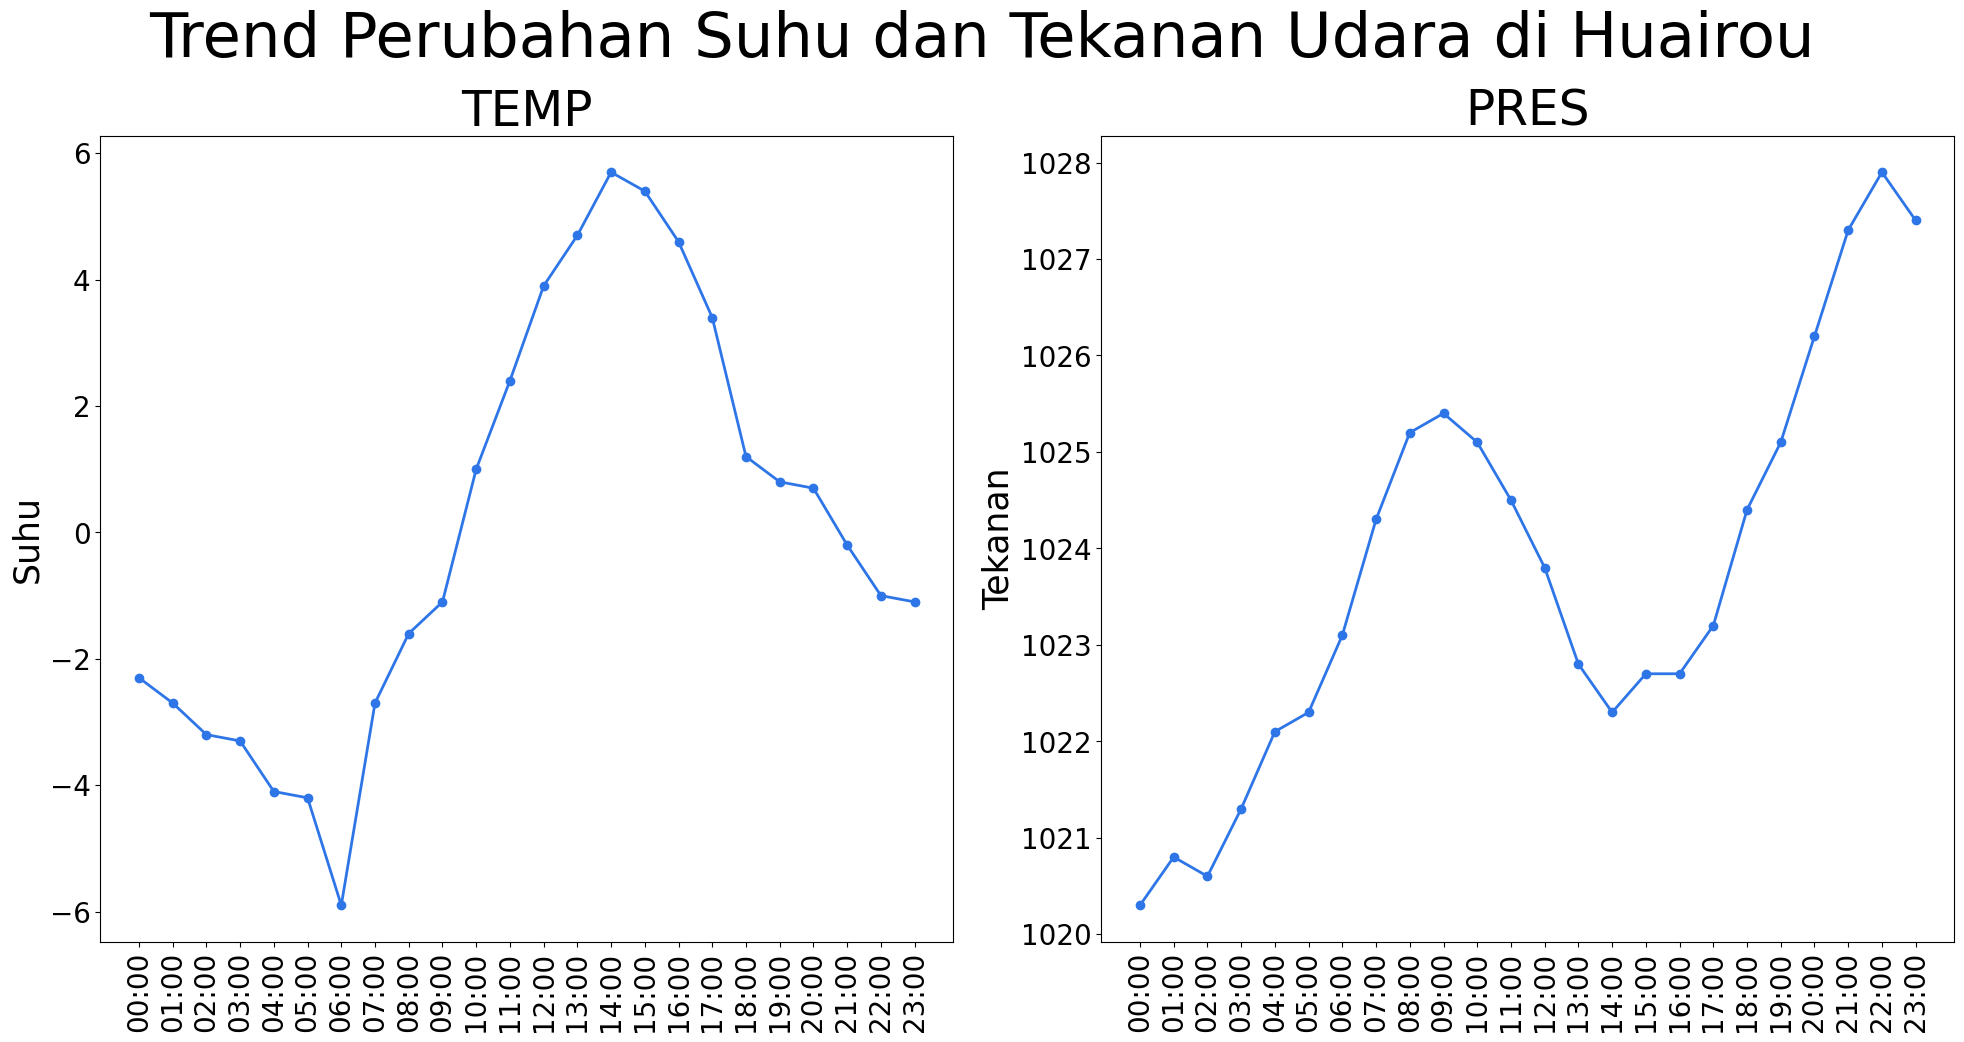

<function __main__.grafik_suhu_tekanan_udara_time(df)>

In [45]:
grafik_suhu_tekanan_udara_time(suhu_tekanan_udara_per_jam.head(24))

Menampilkan grafik trend tingkat suhu dan tekanan udara dalam 24 jam dengan function yang telah dibuat.

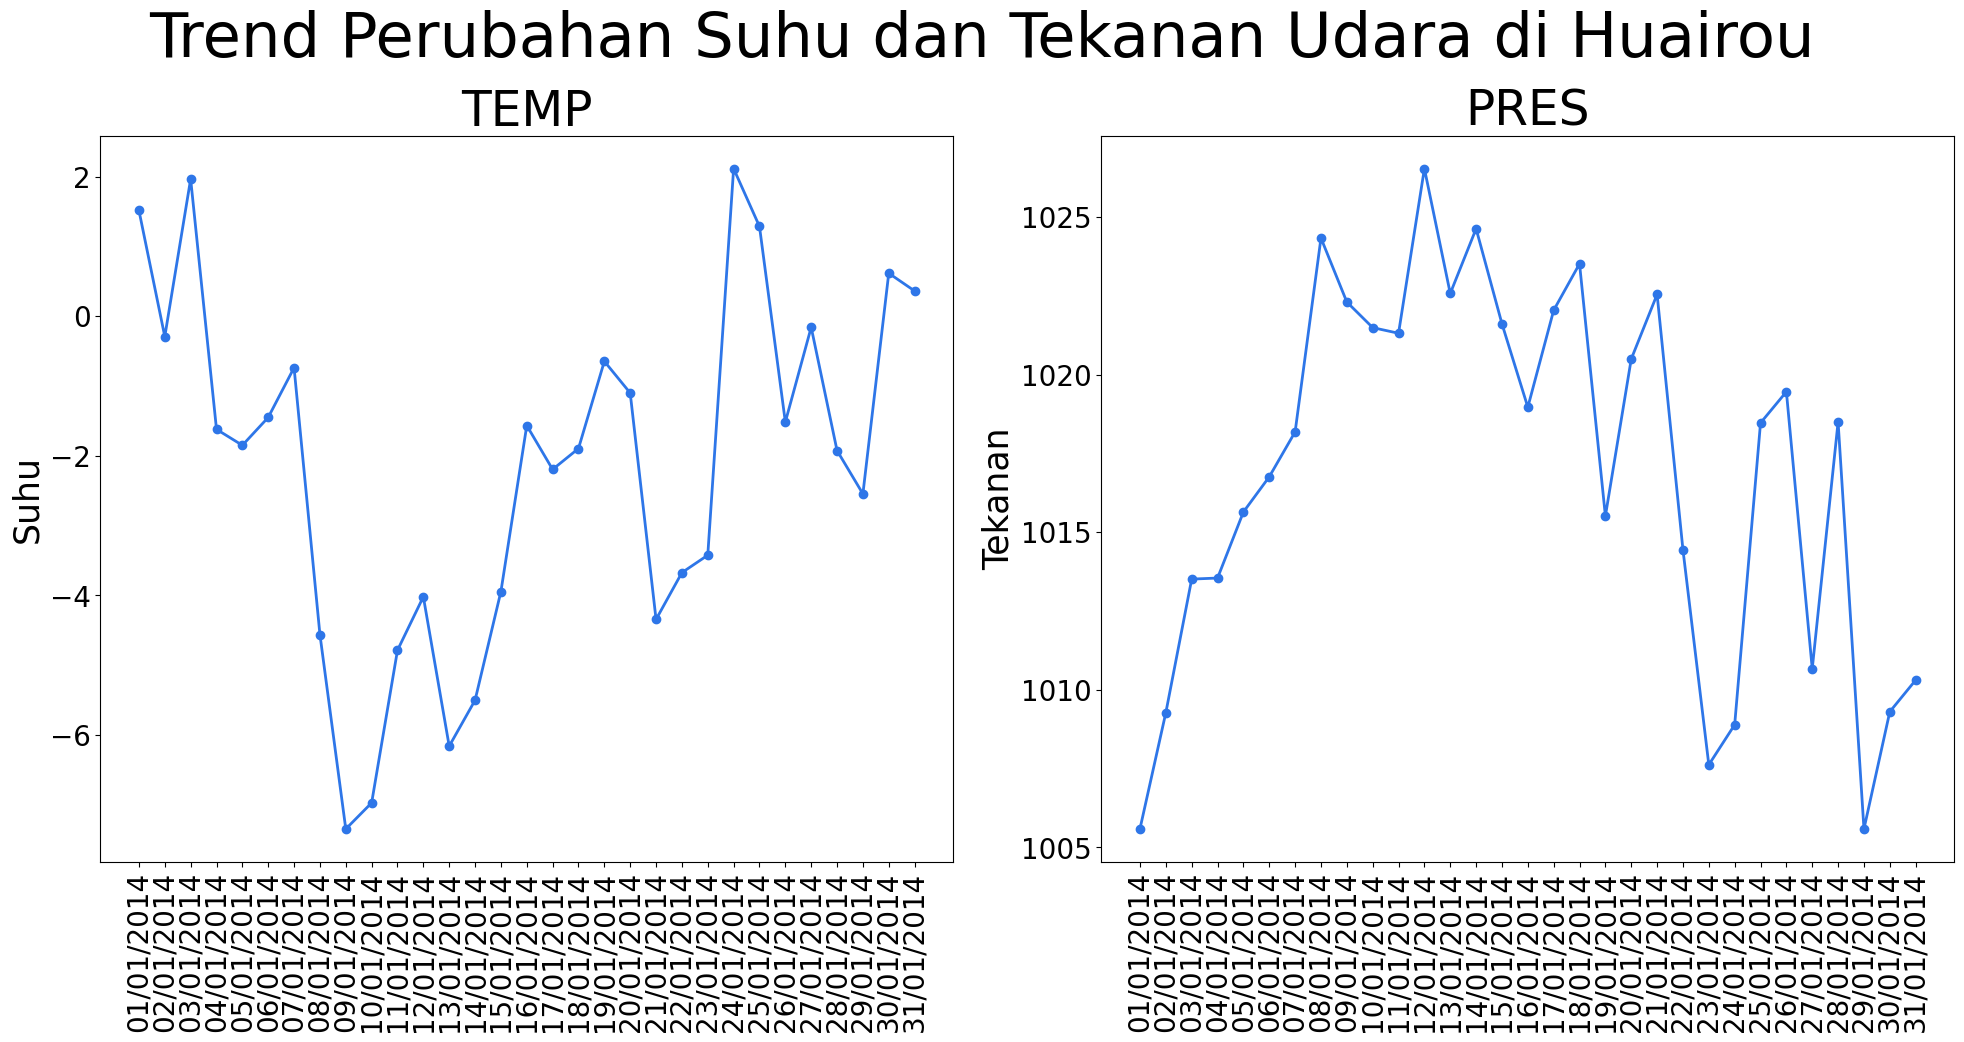

<function __main__.grafik_suhu_tekanan_udara_date(df)>

In [46]:
grafik_suhu_tekanan_udara_date(suhu_tekanan_udara_per_hari.iloc[306:337])

Menampilkan grafik trend tingkat suhu dan tekanan udara dalam 31 hari dengan function yang telah dibuat.

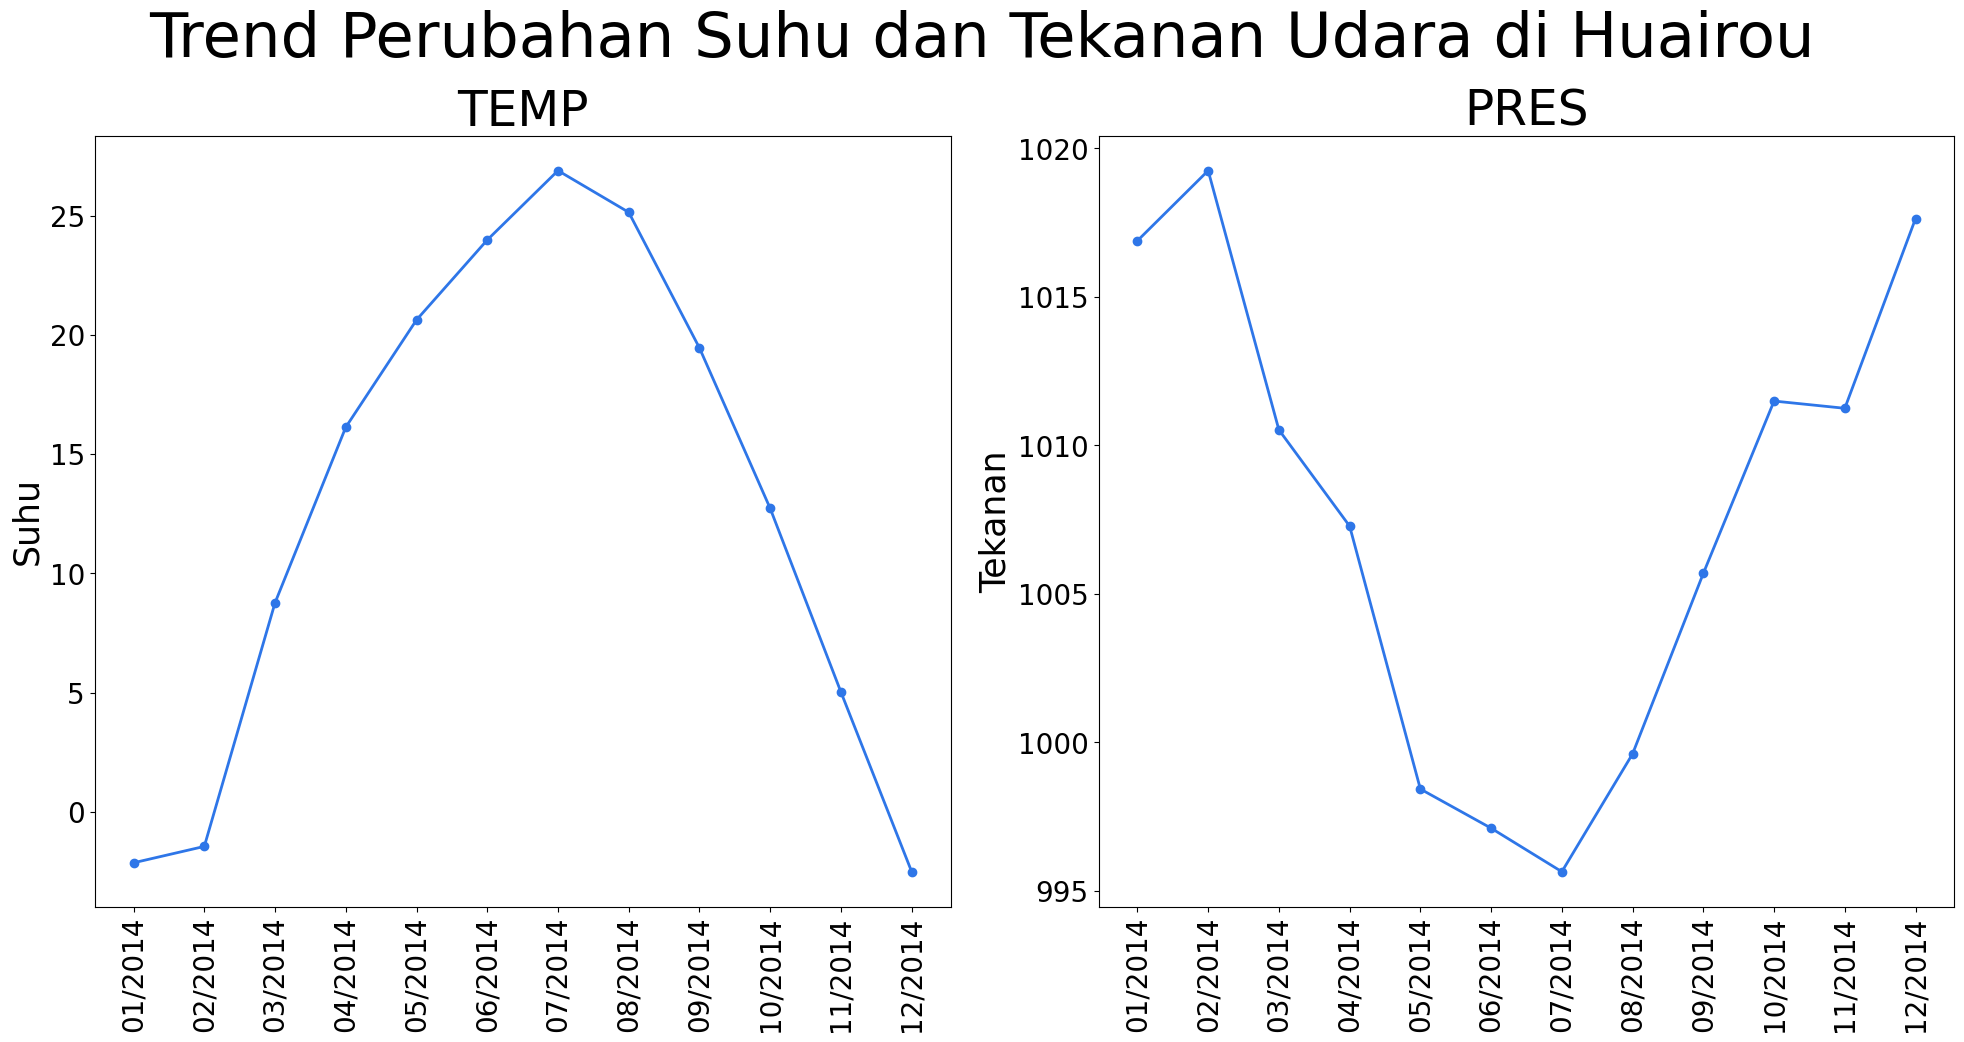

<function __main__.grafik_suhu_tekanan_udara_date(df)>

In [47]:
grafik_suhu_tekanan_udara_date(suhu_tekanan_udara_per_bulan.iloc[10:22])

Menampilkan grafik trend tingkat suhu dan tekanan udara dalam 12 bulan dengan function yang telah dibuat.

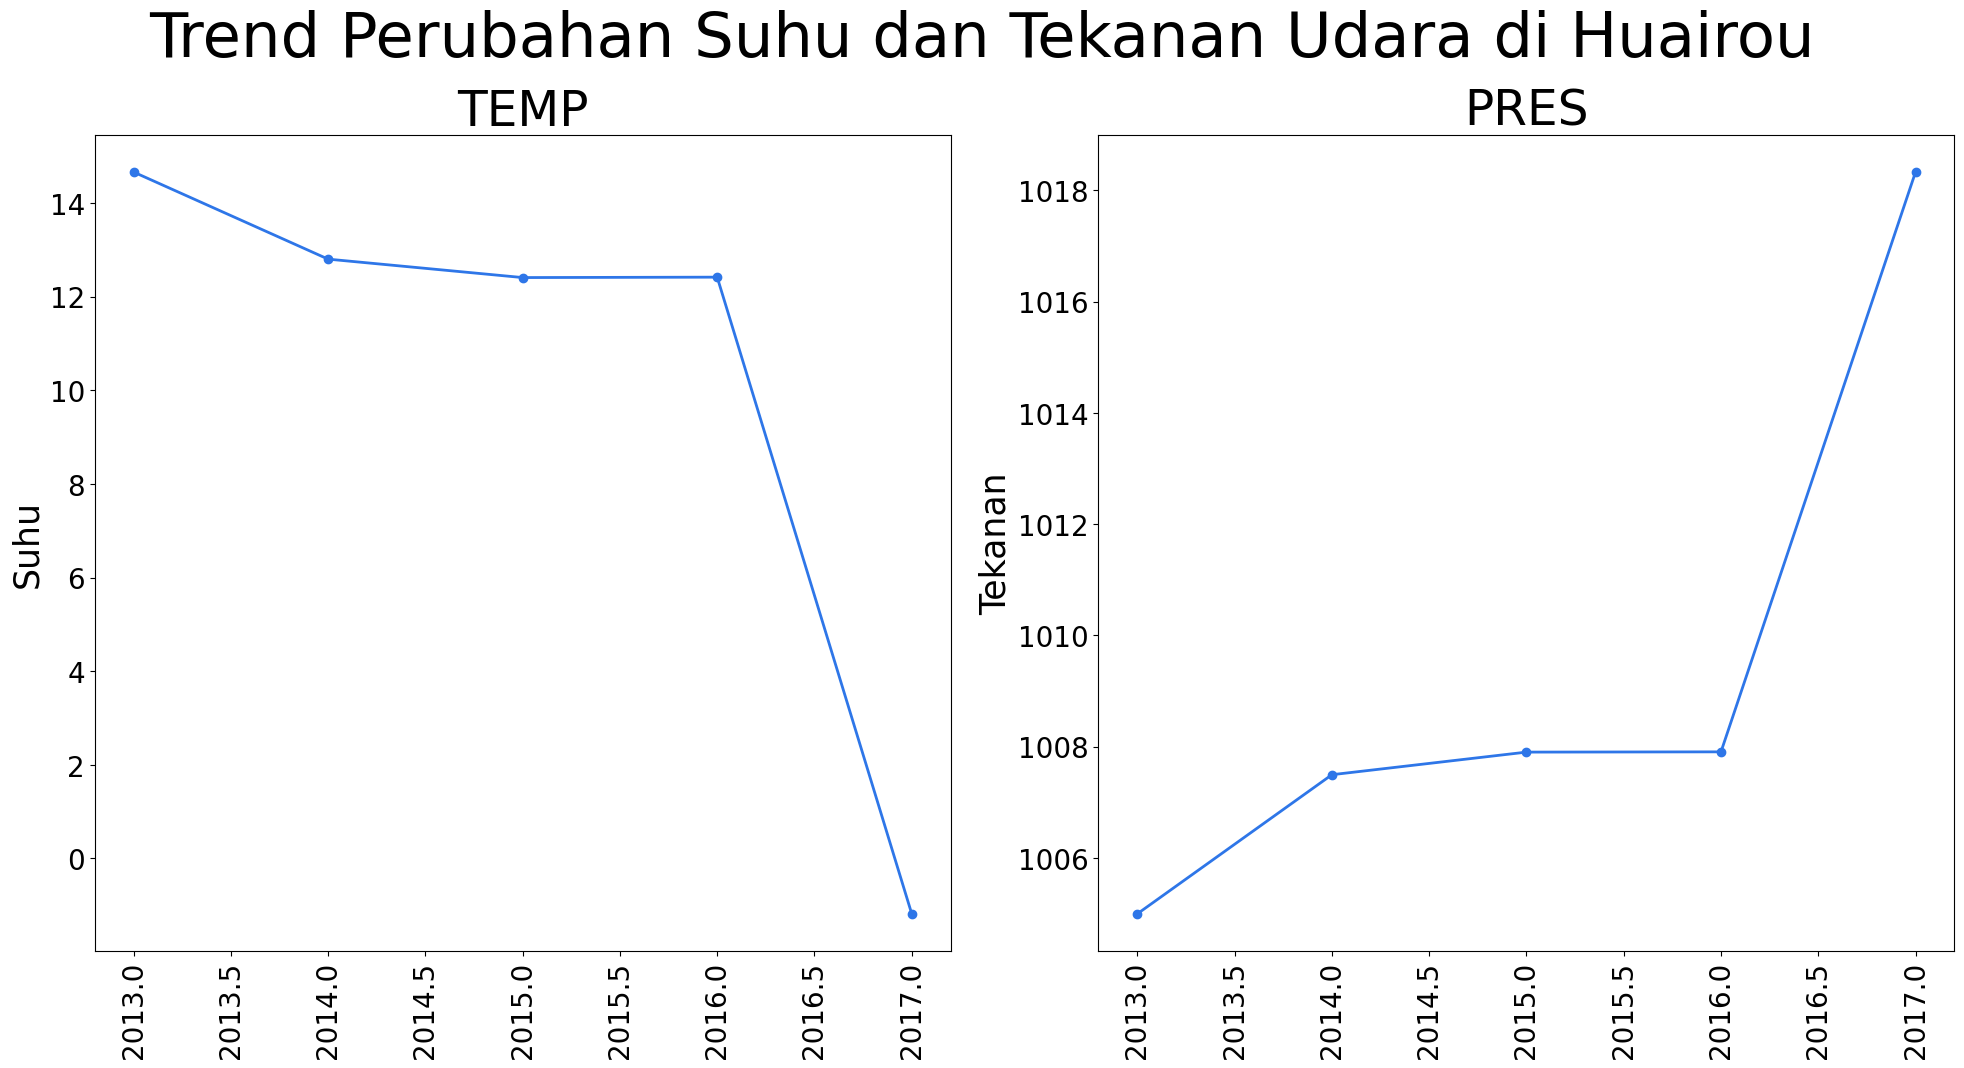

<function __main__.grafik_suhu_tekanan_udara_year(df)>

In [48]:
grafik_suhu_tekanan_udara_year(suhu_tekanan_udara_per_tahun)

Menampilkan grafik trend tingkat suhu dan tekanan udara dalam 5 tahun dengan function yang telah dibuat.

## Conclusion

- Trend tingkat polusi udara di Kota Huairou bersifat fluktuatif. Namun begitu, setelah diklasifikasi tingkat polusi udara PM2.5 dan PM10 pada tahun 2013-2017 cenderung berada pada kondisi tidak sehat untuk PM2.5 dan sedang untuk PM10.

- Trend perubahan tingkat suhu udara di Kota Huairou menunjukan anomali pada tahun 2017, ini dikarenakan data pada tahun 2017 hanya sampai di bulan frebuari.